# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.util import everygrams

In [2]:
#separating byte files and asm files 

source = 'train'
destination_1 = 'byteFiles'
destination_2 = 'asmFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        print(file)
        if (file.endswith("bytes")):
            shutil.move(source+'\\'+file,destination_1)
        if (file.endswith("asm")):
            shutil.move(source+'\\'+file,destination_2)

train


<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


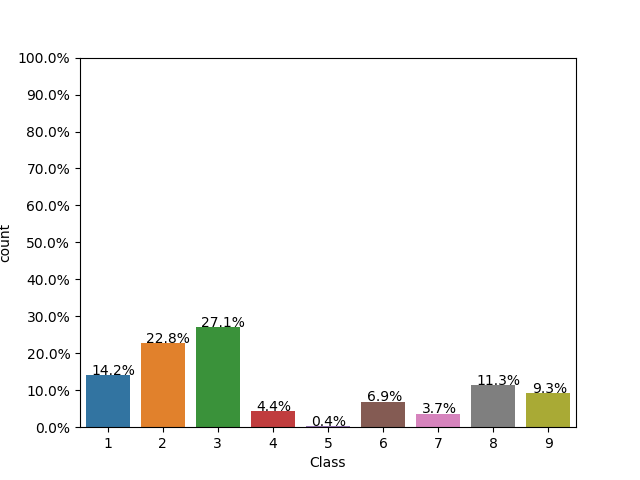

In [3]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [4]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  01azqd4InC7m9JpocGv5  4.234863      9
1  01IsoiSMh5gxyDYTl4CB  5.538818      2
2  01jsnpXSAlgw6aPeDxrU  3.887939      9
3  01kcPWA9K2BOxQeS5Rju  0.574219      1
4  01SuzwMJEIXsK7A8dQbl  0.370850      8


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


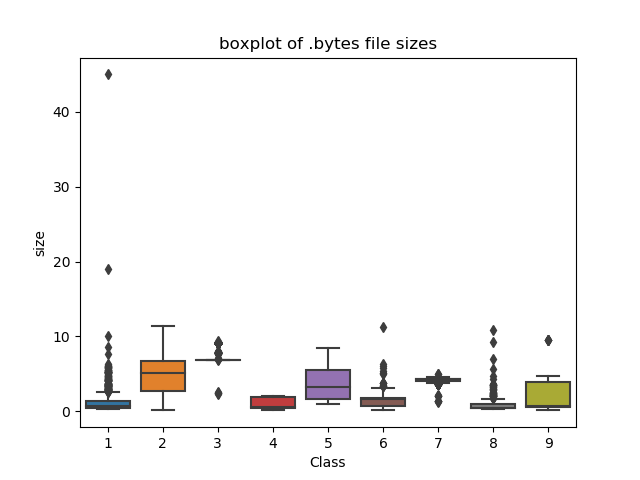

In [5]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [6]:
# #removal of addres from byte files
# # contents of .byte files
# # ----------------
# #00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
# #-------------------
# #we remove the starting address 00401000

# files = os.listdir('byteFiles')
# filenames=[]
# array=[]
# for file in files:
#     if(file.endswith("bytes")):
#         file=file.split('.')[0]
#         text_file = open('byteFiles/'+file+".txt", 'w+')
#         with open('byteFiles/'+file+".bytes","r") as fp:
#             lines=""
#             for line in fp:
#                 a=line.rstrip().split(" ")[1:]
#                 b=' '.join(a)
#                 b=b+"\n"
#                 text_file.write(b)
#             fp.close()
#             os.remove('byteFiles/'+file+".bytes")
#         text_file.close()

# files = os.listdir('byteFiles')
# filenames2=[]
# feature_matrix = np.zeros((len(files),257),dtype=int)
# k=0


# #program to convert into bag of words of bytefiles
# #this is custom-built bag of words this is unigram bag of words
# byte_feature_file=open('result.csv','w+')
# byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
# byte_feature_file.write("\n")
# for file in files:
#     filenames2.append(file)
#     byte_feature_file.write(file+",")
#     if(file.endswith("txt")):
#         with open('byteFiles/'+file,"r") as byte_flie:
#             for lines in byte_flie:
#                 line=lines.rstrip().split(" ")
#                 for hex_code in line:
#                     if hex_code=='??':
#                         feature_matrix[k][256]+=1
#                     else:
#                         feature_matrix[k][int(hex_code,16)]+=1
#         byte_flie.close()
#     for i, row in enumerate(feature_matrix[k]):
#         if i!=len(feature_matrix[k])-1:
#             byte_feature_file.write(str(row)+",")
#         else:
#             byte_feature_file.write(str(row))
#     byte_feature_file.write("\n")
    
#     k += 1

# byte_feature_file.close()

In [7]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()

files = os.listdir('byteFiles')

In [8]:
if not os.path.isfile('result_bigram.csv'):
    dataframe = pd.DataFrame()
    count=0
    bigrams_present =True
    if(not bigrams_present):
        for file in os.listdir('byteFiles'):
            count+=1
            with open("byteFiles/"+file,"r") as byte_flie:
                temp_dict = {}
                for lines in byte_flie:
                    lines = lines.rstrip()
                    tokenize = lines.split(" ")
                    bigrams = everygrams(tokenize,1,2)
                    bigram_fd = nltk.FreqDist(bigrams)
                    for i,j in bigram_fd.items():
                        key = str(i)[1:-1].replace("\'","").replace(",","").replace(" ","")
                        if(key in temp_dict):
                            temp_dict[key]+=j
                        else:
                            temp_dict[key]=j
                #print(temp_dict)
            temp_fd = pd.DataFrame(temp_dict,index =[file.split('.')[0]])
            #print(temp_fd)
            dataframe = pd.concat([dataframe,temp_fd],axis=0)
            if(len(dataframe)%1000 == 0):
                print("processed", count)
                dataframe.to_csv("file_"+str(count)+".csv")
                dataframe = pd.DataFrame()

In [9]:
if not os.path.isfile('result_bigram.csv'):
    all_bigram_features = pd.DataFrame()
    for f in os.listdir('./'):
        if 'file_' in f:
            temp = pd.read_csv(f)
            all_bigram_features = pd.concat([all_bigram_features,temp],axis=0)
    all_bigram_features = all_bigram_features.rename(columns= {'Unnamed: 0': 'ID'})
    all_bigram_features.to_csv('result_bigram.csv')

In [10]:
byte_features=pd.read_csv("result_bigram.csv")
#byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.fillna(0, inplace=True)
byte_features.head(2)

,Unnamed: 0,00,0000,0001,0002,0003,0004,0005,0006,0007,...,FFF7,FFF8,FFF9,FFFA,FFFB,FFFC,FFFD,FFFE,FFFF,ID
0,0,601905.0,273053.0,1002.0,801.0,1170.0,943.0,840.0,1125.0,1003.0,...,10.0,9.0,7.0,5.0,7.0,11.0,9.0,6.0,829.0,01azqd4InC7m9JpocGv5
1,1,39755.0,19852.0,719.0,64.0,43.0,159.0,10.0,6.0,10.0,...,68.0,23.0,72.0,45.0,65.0,15.0,101.0,125.0,4686.0,01IsoiSMh5gxyDYTl4CB


In [11]:
data_size_byte.head(2)

,ID,size,Class
0,01azqd4InC7m9JpocGv5,4.234863,9
1,01IsoiSMh5gxyDYTl4CB,5.538818,2


In [12]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
if not os.path.isfile('result_bigram.csv'):
    byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head(2)

,Unnamed: 0,00,0000,0001,0002,0003,0004,0005,0006,0007,...,FFF9,FFFA,FFFB,FFFC,FFFD,FFFE,FFFF,ID,size,Class
0,0,601905.0,273053.0,1002.0,801.0,1170.0,943.0,840.0,1125.0,1003.0,...,7.0,5.0,7.0,11.0,9.0,6.0,829.0,01azqd4InC7m9JpocGv5,4.234863,9
1,1,39755.0,19852.0,719.0,64.0,43.0,159.0,10.0,6.0,10.0,...,72.0,45.0,65.0,15.0,101.0,125.0,4686.0,01IsoiSMh5gxyDYTl4CB,5.538818,2


In [13]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(byte_features_with_size)

In [14]:
result.head(2)

,Unnamed: 0,00,0000,0001,0002,0003,0004,0005,0006,0007,...,FFF9,FFFA,FFFB,FFFC,FFFD,FFFE,FFFF,ID,size,Class
0,0.000000,0.262806,0.127389,0.079943,0.054323,0.08898,0.064972,0.090303,0.109255,0.121901,...,0.001933,0.003526,0.001031,0.001188,0.001294,0.000759,0.001227,01azqd4InC7m9JpocGv5,0.092219,9
1,0.001001,0.017358,0.009262,0.057364,0.004340,0.00327,0.010955,0.001075,0.000583,0.001215,...,0.019884,0.031735,0.009574,0.001619,0.014518,0.015811,0.006936,01IsoiSMh5gxyDYTl4CB,0.121236,2


In [15]:
data_y = result['Class']
result.head()

,Unnamed: 0,00,0000,0001,0002,0003,0004,0005,0006,0007,...,FFF9,FFFA,FFFB,FFFC,FFFD,FFFE,FFFF,ID,size,Class
0,0.000000,0.262806,0.127389,0.079943,0.054323,0.088980,0.064972,0.090303,0.109255,0.121901,...,0.001933,0.003526,0.001031,0.001188,0.001294,0.000759,0.001227,01azqd4InC7m9JpocGv5,0.092219,9
1,0.001001,0.017358,0.009262,0.057364,0.004340,0.003270,0.010955,0.001075,0.000583,0.001215,...,0.019884,0.031735,0.009574,0.001619,0.014518,0.015811,0.006936,01IsoiSMh5gxyDYTl4CB,0.121236,2
2,0.002002,0.040827,0.007479,0.047232,0.010648,0.010951,0.035070,0.063427,0.053511,0.017744,...,0.022370,0.076164,0.017381,0.007125,0.013943,0.010625,0.003393,01jsnpXSAlgw6aPeDxrU,0.084499,9
3,0.003003,0.009209,0.004620,0.016276,0.004001,0.005248,0.007097,0.003655,0.001845,0.002552,...,0.002486,0.009168,0.002504,0.009284,0.003450,0.007969,0.001954,01kcPWA9K2BOxQeS5Rju,0.010759,1
4,0.004004,0.008629,0.007132,0.004627,0.001356,0.008366,0.000551,0.001183,0.000291,0.000608,...,0.006628,0.001410,0.000147,0.000000,0.000575,0.000379,0.000108,01SuzwMJEIXsK7A8dQbl,0.006233,8


<h3>3.2.4 Multivariate Analysis </h3>

In [16]:
# #multivariate analysis on byte files
# #this is with perplexity 50
# xtsne=TSNE(perplexity=50)
# results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1).sample(1000))
# vis_x = results[:, 0]
# vis_y = results[:, 1]
# plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
# plt.colorbar(ticks=range(10))
# plt.clim(0.5, 9)
# plt.show()

In [17]:
# #this is with perplexity 30
# xtsne=TSNE(perplexity=30)
# results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1).sample(1000))
# vis_x = results[:, 0]
# vis_y = results[:, 1]
# plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
# plt.colorbar(ticks=range(10))
# plt.clim(0.5, 9)
# plt.show()

# Train Test split

In [18]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [19]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


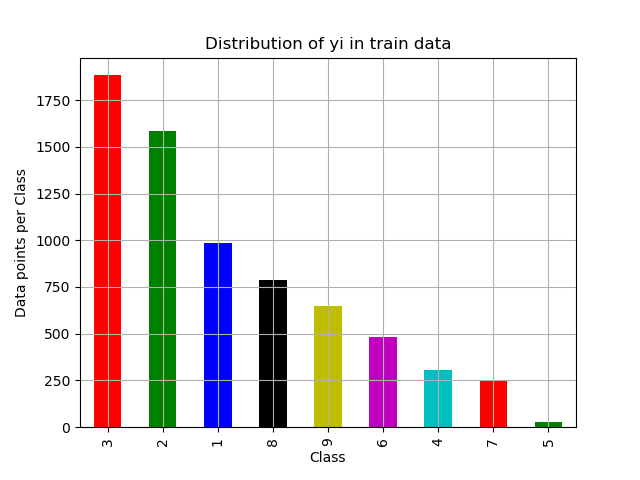

Number of data points in class 1 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 3 : 986 ( 14.177 %)
Number of data points in class 4 : 786 ( 11.301 %)
Number of data points in class 5 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 7 : 304 ( 4.371 %)
Number of data points in class 8 : 254 ( 3.652 %)
Number of data points in class 9 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


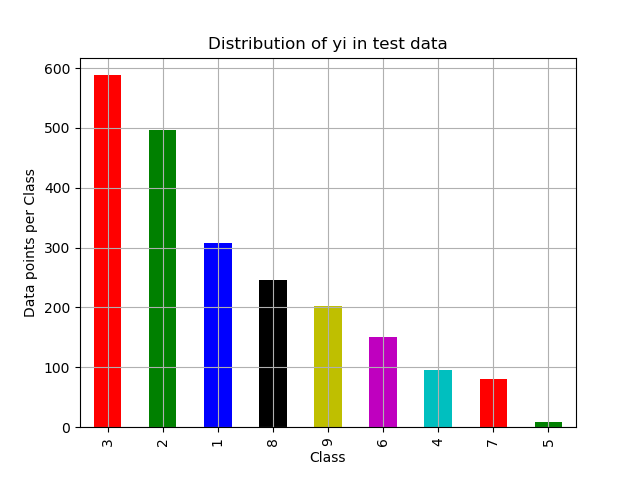

Number of data points in class 1 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 3 : 308 ( 14.167 %)
Number of data points in class 4 : 246 ( 11.316 %)
Number of data points in class 5 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 7 : 95 ( 4.37 %)
Number of data points in class 8 : 80 ( 3.68 %)
Number of data points in class 9 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


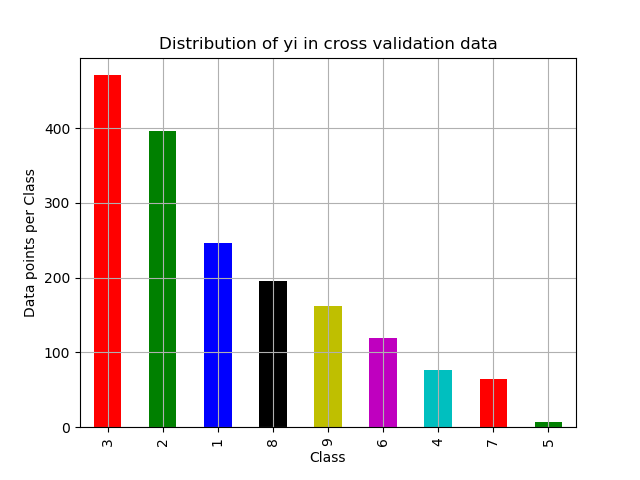

Number of data points in class 1 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 3 : 247 ( 14.204 %)
Number of data points in class 4 : 196 ( 11.271 %)
Number of data points in class 5 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 7 : 76 ( 4.37 %)
Number of data points in class 8 : 64 ( 3.68 %)
Number of data points in class 9 : 7 ( 0.403 %)


In [20]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts()
test_class_distribution = y_test.value_counts()
cv_class_distribution = y_cv.value_counts()

my_colors = list('rgbkymc')
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = list('rgbkymc')
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = list('rgbkymc')
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [21]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.443796312798294
Log loss on Test Data using Random Model 2.4940427524996958
Number of misclassified points  89.0524379024839
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


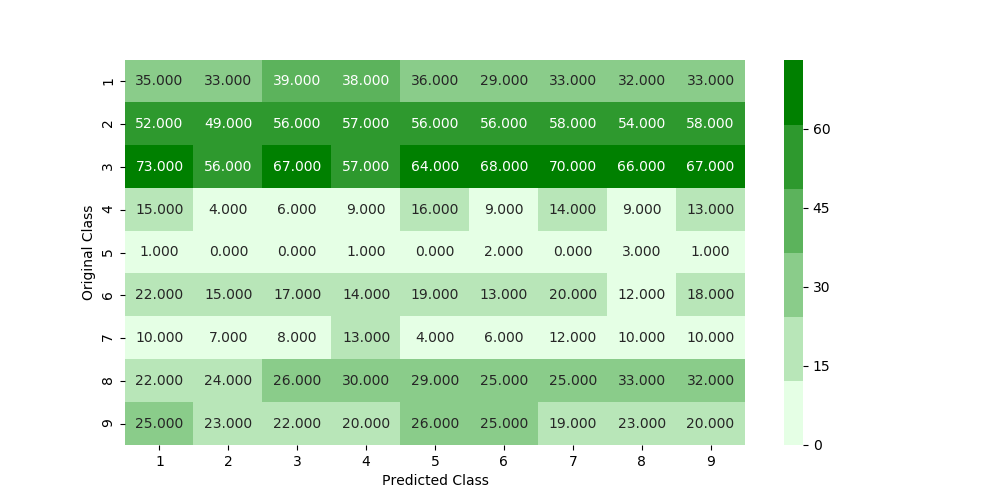

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


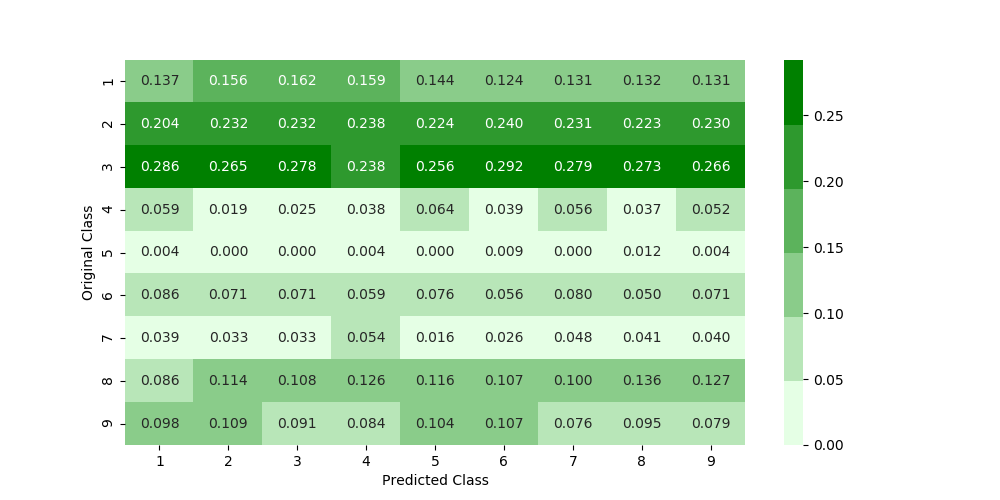

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


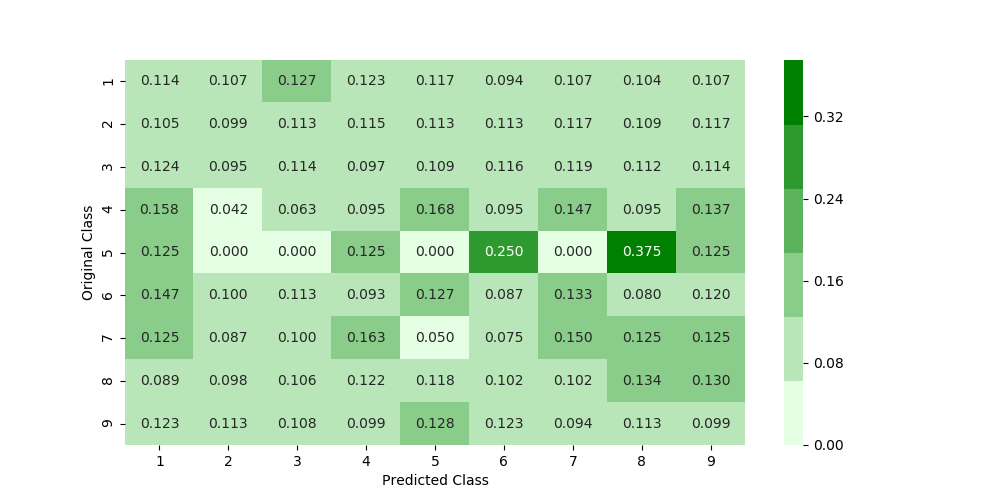

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. Logistic Regression</h3>

for alpha : 1e-05
for alpha : 0.0001
for alpha : 0.001
for alpha : 0.01
for alpha : 0.1
for alpha : 1
for alpha : 10
for alpha : 100
for alpha : 1000
log_loss for c =  1e-05 is 1.5091639470652556
log_loss for c =  0.0001 is 1.1860813213733203
log_loss for c =  0.001 is 0.9049340046491288
log_loss for c =  0.01 is 0.4712626337114123
log_loss for c =  0.1 is 0.2602354198766801
log_loss for c =  1 is 0.1659372318509424
log_loss for c =  10 is 0.15520639357525837
log_loss for c =  100 is 0.17001171748331728
log_loss for c =  1000 is 0.17844179270952115


<IPython.core.display.Javascript object>


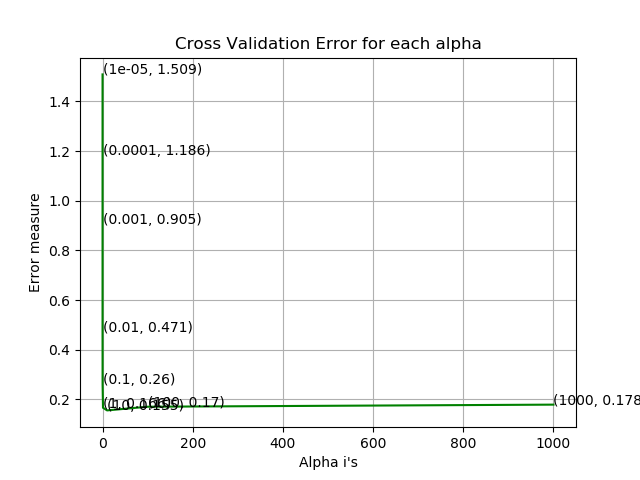

In [23]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    print("for alpha :", i)
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    #logisticR = SGDClassifier(loss='log', penalty='l2', alpha=i, class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [24]:
alpha[best_alpha]

10

log loss for train data 0.06654660321053883
log loss for cv data 0.15520639357525837
log loss for test data 0.21466039403254375
Number of misclassified points  2.391904323827047
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


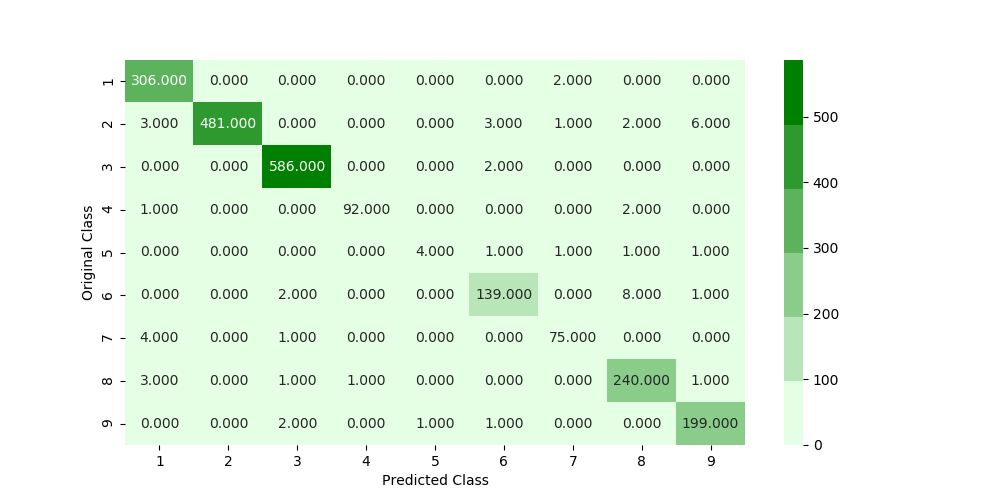

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


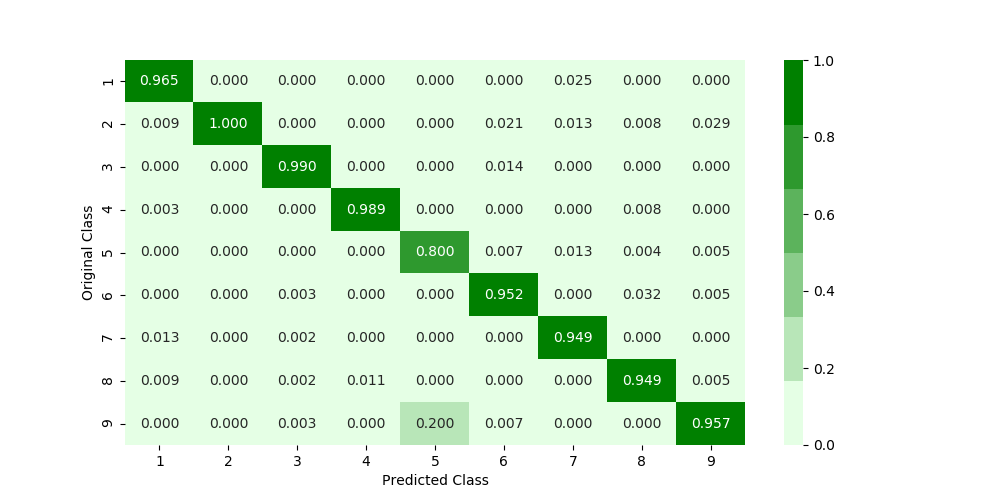

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


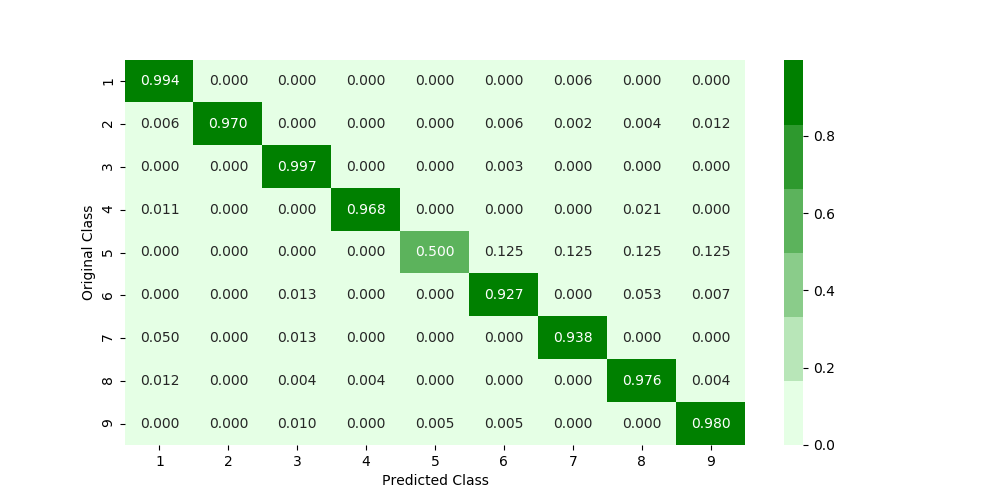

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [26]:
# #intially create five folders
# #first 
# #second
# #thrid
# #fourth
# #fifth
# #this code tells us about random split of files into five folders
# folder_1 ='first'
# folder_2 ='second'
# folder_3 ='third'
# folder_4 ='fourth'
# folder_5 ='fifth'
# folder_6 = 'output'
# for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
#     if not os.path.isdir(i):
#         os.makedirs(i)

# source='train/'
# files = os.listdir('train')
# ID=df['Id'].tolist()
# data=range(0,10868)
# r.shuffle(data)
# count=0
# for i in range(0,10868):
#     if i % 5==0:
#         shutil.move(source+files[data[i]],'first')
#     elif i%5==1:
#         shutil.move(source+files[data[i]],'second')
#     elif i%5 ==2:
#         shutil.move(source+files[data[i]],'thrid')
#     elif i%5 ==3:
#         shutil.move(source+files[data[i]],'fourth')
#     elif i%5==4:
#         shutil.move(source+files[data[i]],'fifth')

In [27]:

# #http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

# def firstprocess():
#     #The prefixes tells about the segments that are present in the asm files
#     #There are 450 segments(approx) present in all asm files.
#     #this prefixes are best segments that gives us best values.
#     #https://en.wikipedia.org/wiki/Data_segment
    
#     prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
#     #this are opcodes that are used to get best results
#     #https://en.wikipedia.org/wiki/X86_instruction_listings
    
#     opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
#     #best keywords that are taken from different blogs
#     keywords = ['.dll','std::',':dword']
#     #Below taken registers are general purpose registers and special registers
#     #All the registers which are taken are best 
#     registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
#     file1=open("output\asmsmallfile.txt","w+")
#     files = os.listdir('first')
#     for f in files:
#         #filling the values with zeros into the arrays
#         prefixescount=np.zeros(len(prefixes),dtype=int)
#         opcodescount=np.zeros(len(opcodes),dtype=int)
#         keywordcount=np.zeros(len(keywords),dtype=int)
#         registerscount=np.zeros(len(registers),dtype=int)
#         features=[]
#         f2=f.split('.')[0]
#         file1.write(f2+",")
#         opcodefile.write(f2+" ")
#         # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
#         # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
#         with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
#             for lines in fli:
#                 # https://www.tutorialspoint.com/python3/string_rstrip.htm
#                 line=lines.rstrip().split()
#                 l=line[0]
#                 #counting the prefixs in each and every line
#                 for i in range(len(prefixes)):
#                     if prefixes[i] in line[0]:
#                         prefixescount[i]+=1
#                 line=line[1:]
#                 #counting the opcodes in each and every line
#                 for i in range(len(opcodes)):
#                     if any(opcodes[i]==li for li in line):
#                         features.append(opcodes[i])
#                         opcodescount[i]+=1
#                 #counting registers in the line
#                 for i in range(len(registers)):
#                     for li in line:
#                         # we will use registers only in 'text' and 'CODE' segments
#                         if registers[i] in li and ('text' in l or 'CODE' in l):
#                             registerscount[i]+=1
#                 #counting keywords in the line
#                 for i in range(len(keywords)):
#                     for li in line:
#                         if keywords[i] in li:
#                             keywordcount[i]+=1
#         #pushing the values into the file after reading whole file
#         for prefix in prefixescount:
#             file1.write(str(prefix)+",")
#         for opcode in opcodescount:
#             file1.write(str(opcode)+",")
#         for register in registerscount:
#             file1.write(str(register)+",")
#         for key in keywordcount:
#             file1.write(str(key)+",")
#         file1.write("\n")
#     file1.close()


# #same as above 
# def secondprocess():
#     prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
#     opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
#     keywords = ['.dll','std::',':dword']
#     registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
#     file1=open("output\mediumasmfile.txt","w+")
#     files = os.listdir('second')
#     for f in files:
#         prefixescount=np.zeros(len(prefixes),dtype=int)
#         opcodescount=np.zeros(len(opcodes),dtype=int)
#         keywordcount=np.zeros(len(keywords),dtype=int)
#         registerscount=np.zeros(len(registers),dtype=int)
#         features=[]
#         f2=f.split('.')[0]
#         file1.write(f2+",")
#         opcodefile.write(f2+" ")
#         with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
#             for lines in fli:
#                 line=lines.rstrip().split()
#                 l=line[0]
#                 for i in range(len(prefixes)):
#                     if prefixes[i] in line[0]:
#                         prefixescount[i]+=1
#                 line=line[1:]
#                 for i in range(len(opcodes)):
#                     if any(opcodes[i]==li for li in line):
#                         features.append(opcodes[i])
#                         opcodescount[i]+=1
#                 for i in range(len(registers)):
#                     for li in line:
#                         if registers[i] in li and ('text' in l or 'CODE' in l):
#                             registerscount[i]+=1
#                 for i in range(len(keywords)):
#                     for li in line:
#                         if keywords[i] in li:
#                             keywordcount[i]+=1
#         for prefix in prefixescount:
#             file1.write(str(prefix)+",")
#         for opcode in opcodescount:
#             file1.write(str(opcode)+",")
#         for register in registerscount:
#             file1.write(str(register)+",")
#         for key in keywordcount:
#             file1.write(str(key)+",")
#         file1.write("\n")
#     file1.close()

# # same as smallprocess() functions
# def thirdprocess():
#     prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
#     opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
#     keywords = ['.dll','std::',':dword']
#     registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
#     file1=open("output\largeasmfile.txt","w+")
#     files = os.listdir('thrid')
#     for f in files:
#         prefixescount=np.zeros(len(prefixes),dtype=int)
#         opcodescount=np.zeros(len(opcodes),dtype=int)
#         keywordcount=np.zeros(len(keywords),dtype=int)
#         registerscount=np.zeros(len(registers),dtype=int)
#         features=[]
#         f2=f.split('.')[0]
#         file1.write(f2+",")
#         opcodefile.write(f2+" ")
#         with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
#             for lines in fli:
#                 line=lines.rstrip().split()
#                 l=line[0]
#                 for i in range(len(prefixes)):
#                     if prefixes[i] in line[0]:
#                         prefixescount[i]+=1
#                 line=line[1:]
#                 for i in range(len(opcodes)):
#                     if any(opcodes[i]==li for li in line):
#                         features.append(opcodes[i])
#                         opcodescount[i]+=1
#                 for i in range(len(registers)):
#                     for li in line:
#                         if registers[i] in li and ('text' in l or 'CODE' in l):
#                             registerscount[i]+=1
#                 for i in range(len(keywords)):
#                     for li in line:
#                         if keywords[i] in li:
#                             keywordcount[i]+=1
#         for prefix in prefixescount:
#             file1.write(str(prefix)+",")
#         for opcode in opcodescount:
#             file1.write(str(opcode)+",")
#         for register in registerscount:
#             file1.write(str(register)+",")
#         for key in keywordcount:
#             file1.write(str(key)+",")
#         file1.write("\n")
#     file1.close()


# def fourthprocess():
#     prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
#     opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
#     keywords = ['.dll','std::',':dword']
#     registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
#     file1=open("output\hugeasmfile.txt","w+")
#     files = os.listdir('fourth/')
#     for f in files:
#         prefixescount=np.zeros(len(prefixes),dtype=int)
#         opcodescount=np.zeros(len(opcodes),dtype=int)
#         keywordcount=np.zeros(len(keywords),dtype=int)
#         registerscount=np.zeros(len(registers),dtype=int)
#         features=[]
#         f2=f.split('.')[0]
#         file1.write(f2+",")
#         opcodefile.write(f2+" ")
#         with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
#             for lines in fli:
#                 line=lines.rstrip().split()
#                 l=line[0]
#                 for i in range(len(prefixes)):
#                     if prefixes[i] in line[0]:
#                         prefixescount[i]+=1
#                 line=line[1:]
#                 for i in range(len(opcodes)):
#                     if any(opcodes[i]==li for li in line):
#                         features.append(opcodes[i])
#                         opcodescount[i]+=1
#                 for i in range(len(registers)):
#                     for li in line:
#                         if registers[i] in li and ('text' in l or 'CODE' in l):
#                             registerscount[i]+=1
#                 for i in range(len(keywords)):
#                     for li in line:
#                         if keywords[i] in li:
#                             keywordcount[i]+=1
#         for prefix in prefixescount:
#             file1.write(str(prefix)+",")
#         for opcode in opcodescount:
#             file1.write(str(opcode)+",")
#         for register in registerscount:
#             file1.write(str(register)+",")
#         for key in keywordcount:
#             file1.write(str(key)+",")
#         file1.write("\n")
#     file1.close()


# def fifthprocess():
#     prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
#     opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
#     keywords = ['.dll','std::',':dword']
#     registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
#     file1=open("output\trainasmfile.txt","w+")
#     files = os.listdir('fifth/')
#     for f in files:
#         prefixescount=np.zeros(len(prefixes),dtype=int)
#         opcodescount=np.zeros(len(opcodes),dtype=int)
#         keywordcount=np.zeros(len(keywords),dtype=int)
#         registerscount=np.zeros(len(registers),dtype=int)
#         features=[]
#         f2=f.split('.')[0]
#         file1.write(f2+",")
#         opcodefile.write(f2+" ")
#         with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
#             for lines in fli:
#                 line=lines.rstrip().split()
#                 l=line[0]
#                 for i in range(len(prefixes)):
#                     if prefixes[i] in line[0]:
#                         prefixescount[i]+=1
#                 line=line[1:]
#                 for i in range(len(opcodes)):
#                     if any(opcodes[i]==li for li in line):
#                         features.append(opcodes[i])
#                         opcodescount[i]+=1
#                 for i in range(len(registers)):
#                     for li in line:
#                         if registers[i] in li and ('text' in l or 'CODE' in l):
#                             registerscount[i]+=1
#                 for i in range(len(keywords)):
#                     for li in line:
#                         if keywords[i] in li:
#                             keywordcount[i]+=1
#         for prefix in prefixescount:
#             file1.write(str(prefix)+",")
#         for opcode in opcodescount:
#             file1.write(str(opcode)+",")
#         for register in registerscount:
#             file1.write(str(register)+",")
#         for key in keywordcount:
#             file1.write(str(key)+",")
#         file1.write("\n")
#     file1.close()


# def main():
#     #the below code is used for multiprogramming
#     #the number of process depends upon the number of cores present System
#     #process is used to call multiprogramming
#     manager=multiprocessing.Manager() 	
#     p1=Process(target=firstprocess)
#     p2=Process(target=secondprocess)
#     p3=Process(target=thirdprocess)
#     p4=Process(target=fourthprocess)
#     p5=Process(target=fifthprocess)
#     #p1.start() is used to start the thread execution
#     p1.start()
#     p2.start()
#     p3.start()
#     p4.start()
#     p5.start()
#     #After completion all the threads are joined
#     p1.join()
#     p2.join()
#     p3.join()
#     p4.join()
#     p5.join()

# if __name__=="__main__":
#     main()

In [28]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,18,66,15,43,83,0,17,48,29,1
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,18,29,48,82,12,0,14,0,20,1
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,13,42,10,67,14,0,11,0,9,1
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,6,8,14,7,2,0,8,0,6,1
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,12,9,18,29,5,0,11,0,11,1


<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [29]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


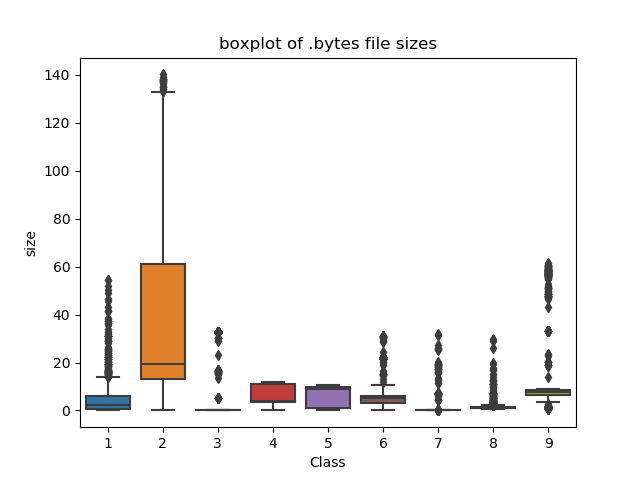

In [30]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [31]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,66,15,43,83,0,17,48,29,1,0.078190
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,29,48,82,12,0,14,0,20,1,0.063400
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,42,10,67,14,0,11,0,9,1,0.041695
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,8,14,7,2,0,8,0,6,1,0.018757
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,9,18,29,5,0,11,0,11,1,0.037567


In [32]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size
0,01kcPWA9K2BOxQeS5Rju,0.107345,0.001092,0.0,0.000761,0.000023,0.0,0.000084,0.0,0.000072,...,0.000746,0.000301,0.000360,0.001057,0.0,0.030797,0.001468,0.003173,1,0.000432
1,1E93CpP60RHFNiT5Qfvn,0.096045,0.001230,0.0,0.000617,0.000019,0.0,0.000000,0.0,0.000072,...,0.000328,0.000965,0.000686,0.000153,0.0,0.025362,0.000000,0.002188,1,0.000327
2,3ekVow2ajZHbTnBcsDfX,0.096045,0.000627,0.0,0.000300,0.000017,0.0,0.000038,0.0,0.000072,...,0.000475,0.000201,0.000560,0.000178,0.0,0.019928,0.000000,0.000985,1,0.000172
3,3X2nY7iQaPBIWDrAZqJe,0.096045,0.000333,0.0,0.000258,0.000008,0.0,0.000000,0.0,0.000072,...,0.000090,0.000281,0.000059,0.000025,0.0,0.014493,0.000000,0.000657,1,0.000009
4,46OZzdsSKDCFV8h7XWxf,0.096045,0.000590,0.0,0.000353,0.000068,0.0,0.000000,0.0,0.000072,...,0.000102,0.000362,0.000243,0.000064,0.0,0.019928,0.000000,0.001204,1,0.000143


<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


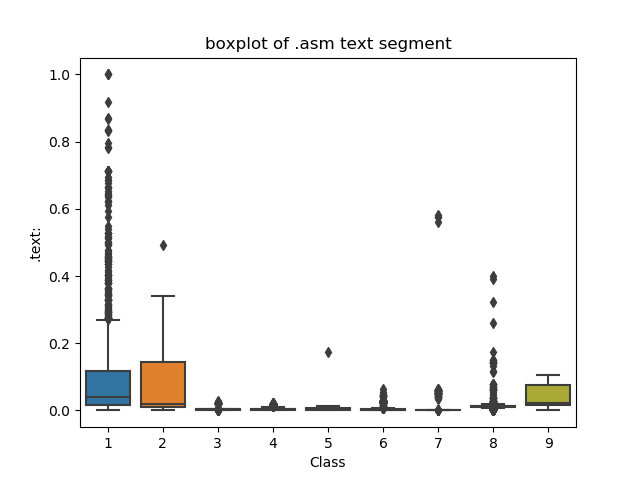

In [33]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


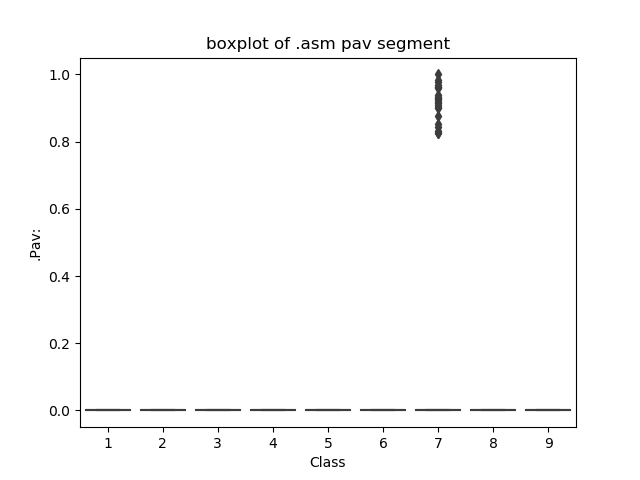

In [34]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


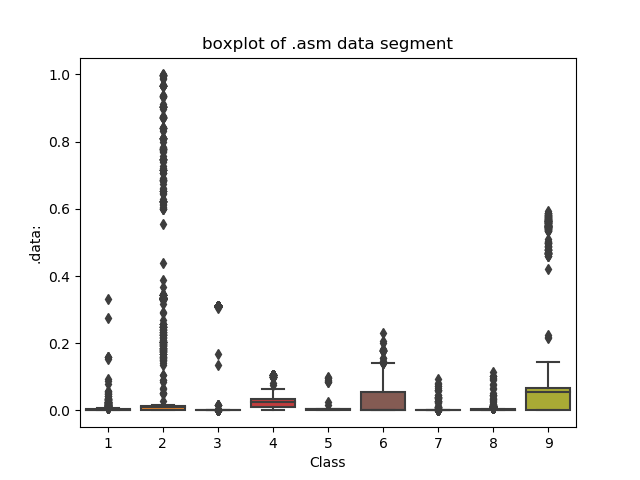

In [35]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


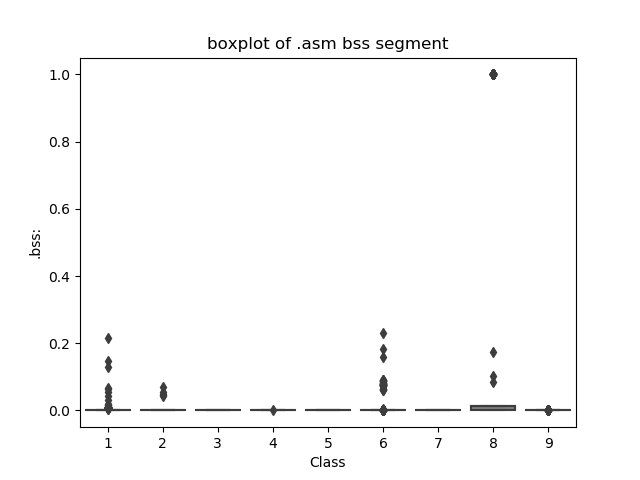

In [36]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


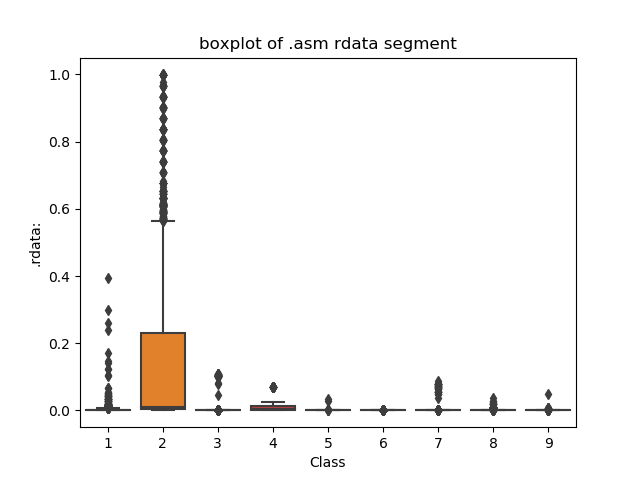

In [37]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


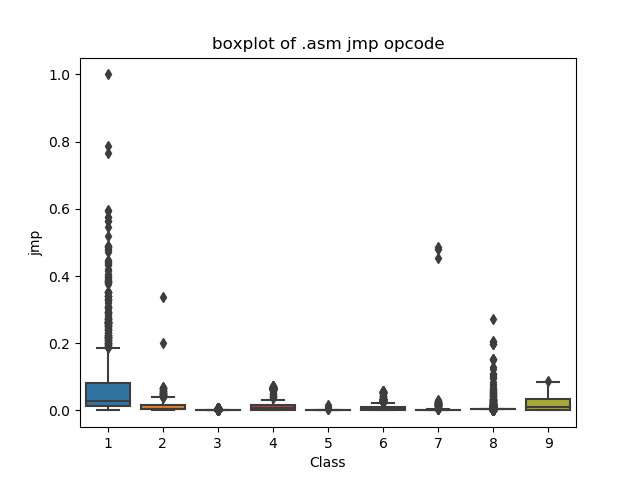

In [38]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


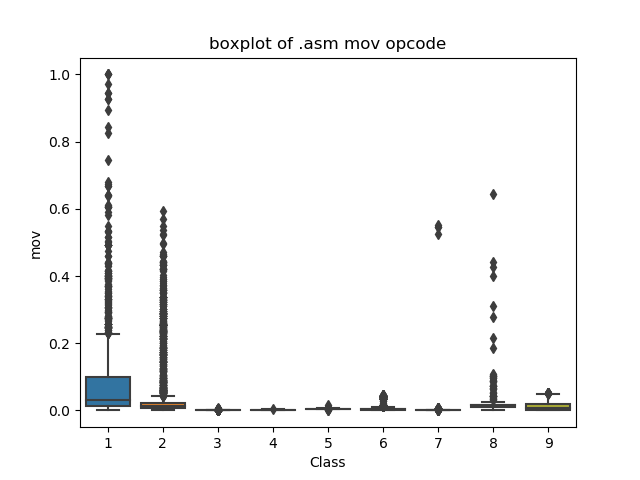

In [39]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


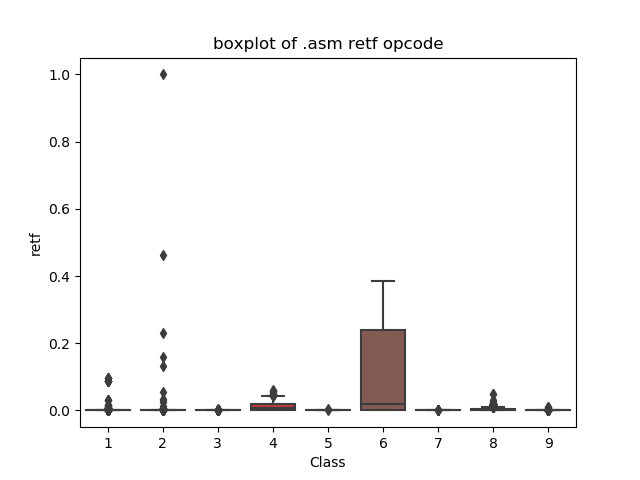

In [40]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


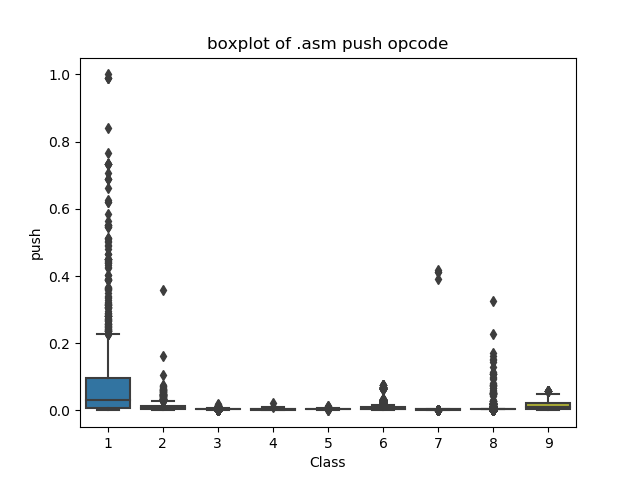

In [41]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


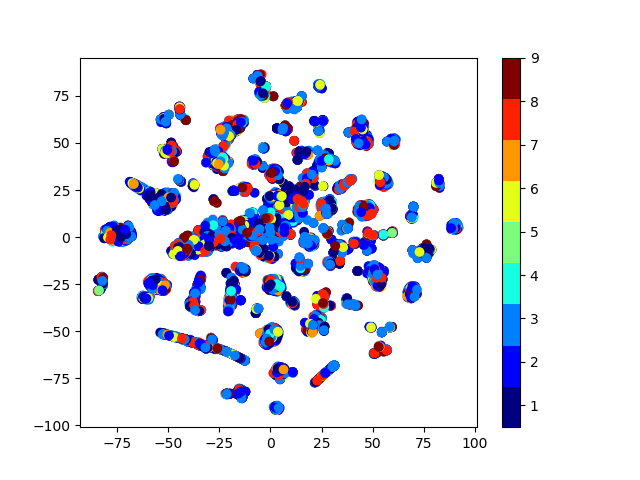

In [42]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


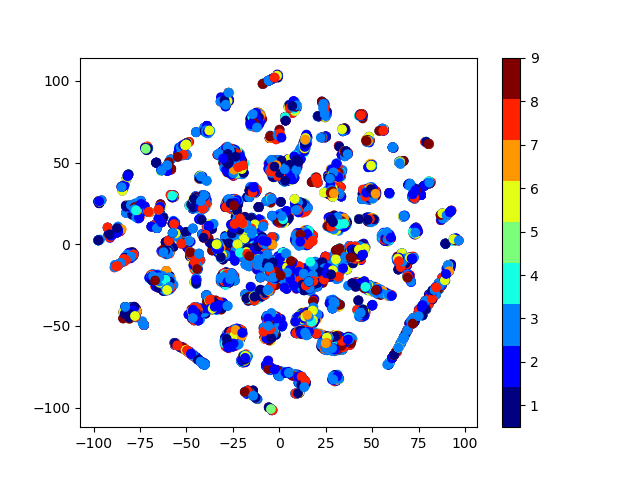

In [43]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h3> 4.2.4 Adding pixel density features</h3>

In [44]:
import numpy,scipy.misc, os, array
def read_image(filename):
    f = open(filename,'rb')
    ln = os.path.getsize(filename) # length of file in bytes
    width = 256
    rem = ln%width
    a = array.array("B") # uint8 array
    a.fromfile(f,ln-rem)
    f.close()
    g = numpy.reshape(a,(len(a)//width,width))
    g = numpy.uint8(g)
    f = g.copy()
    f.resize((1000,))
    return list(f)

In [45]:
image_1000_features = result_asm.ID.apply(lambda x: (read_image('asmFiles/'+x+'.asm'))).apply(pd.Series)

In [46]:
image_1000_features.columns = [x+10000 for x in image_1000_features.columns]

In [47]:
image_1000_features.head()

,10000,10001,10002,10003,10004,10005,10006,10007,10008,10009,...,10990,10991,10992,10993,10994,10995,10996,10997,10998,10999
0,72,69,65,68,69,82,58,49,48,48,...,71,77,69,78,84,32,72,69,65,68
1,72,69,65,68,69,82,58,54,67,53,...,32,32,32,32,58,9,80,111,114,116
2,72,69,65,68,69,82,58,49,48,48,...,59,32,70,111,114,109,97,116,9,32
3,72,69,65,68,69,82,58,49,49,48,...,32,32,32,32,58,9,80,111,114,116
4,72,69,65,68,69,82,58,55,54,51,...,32,32,32,32,58,9,80,111,114,116


In [48]:
result_asm = pd.concat([result_asm,image_1000_features],axis=1)

In [49]:
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,10990,10991,10992,10993,10994,10995,10996,10997,10998,10999
0,01kcPWA9K2BOxQeS5Rju,0.107345,0.001092,0.0,0.000761,0.000023,0.0,0.000084,0.0,0.000072,...,71,77,69,78,84,32,72,69,65,68
1,1E93CpP60RHFNiT5Qfvn,0.096045,0.001230,0.0,0.000617,0.000019,0.0,0.000000,0.0,0.000072,...,32,32,32,32,58,9,80,111,114,116
2,3ekVow2ajZHbTnBcsDfX,0.096045,0.000627,0.0,0.000300,0.000017,0.0,0.000038,0.0,0.000072,...,59,32,70,111,114,109,97,116,9,32
3,3X2nY7iQaPBIWDrAZqJe,0.096045,0.000333,0.0,0.000258,0.000008,0.0,0.000000,0.0,0.000072,...,32,32,32,32,58,9,80,111,114,116
4,46OZzdsSKDCFV8h7XWxf,0.096045,0.000590,0.0,0.000353,0.000068,0.0,0.000000,0.0,0.000072,...,32,32,32,32,58,9,80,111,114,116


<h2> 4.3 Train and test split</h2>

In [50]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [51]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [52]:
#print( X_cv_asm.isnull().all())

<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

For k =  1
For k =  3
For k =  5
For k =  7
For k =  9
For k =  11
For k =  13
For k =  15
For k =  17
For k =  19
log_loss for k =  1 is 0.03957063826268944
log_loss for k =  3 is 0.051404140483720065
log_loss for k =  5 is 0.060458399090755545
log_loss for k =  7 is 0.06926503500170093
log_loss for k =  9 is 0.07662482937608156
log_loss for k =  11 is 0.08533517515537771
log_loss for k =  13 is 0.09201851136153923
log_loss for k =  15 is 0.09951338808060389
log_loss for k =  17 is 0.10600066326872025
log_loss for k =  19 is 0.11164566751230305


<IPython.core.display.Javascript object>


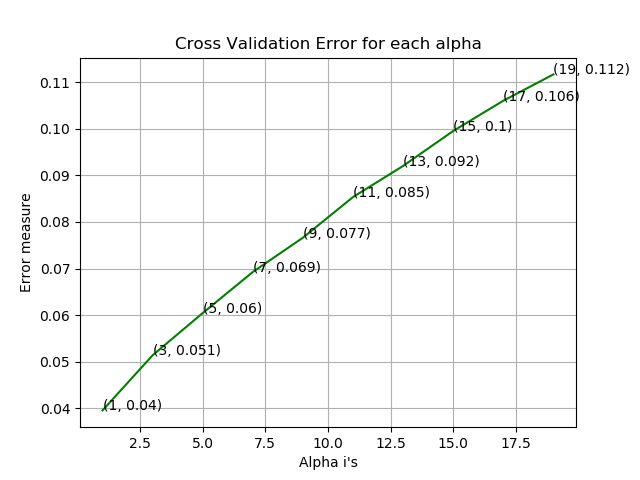

log loss for train data 0.014493418765645175
log loss for cv data 0.03957063826268944
log loss for test data 0.060795224711157655
Number of misclassified points  0.8739650413983441
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


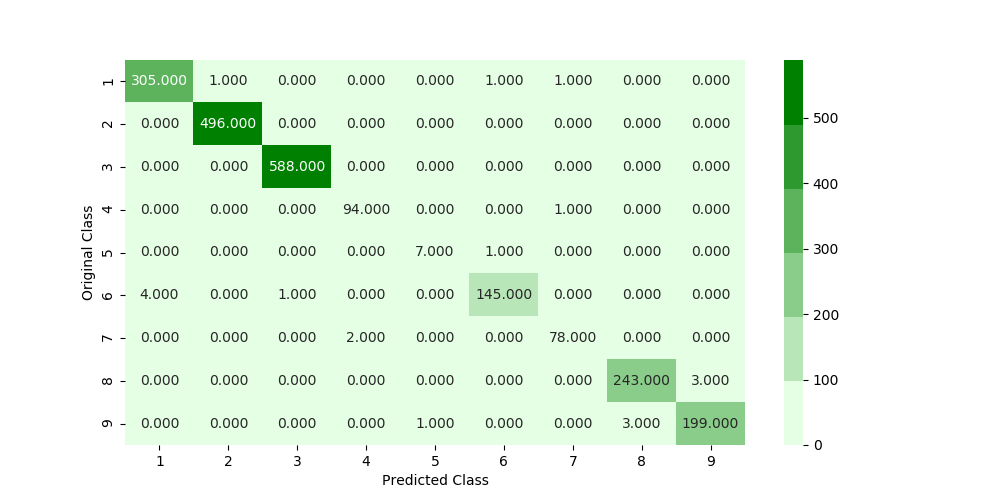

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


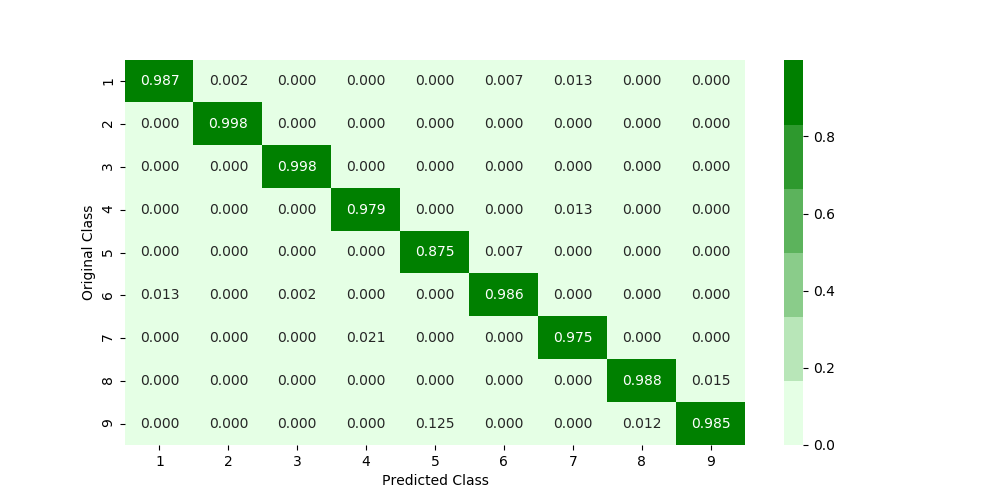

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


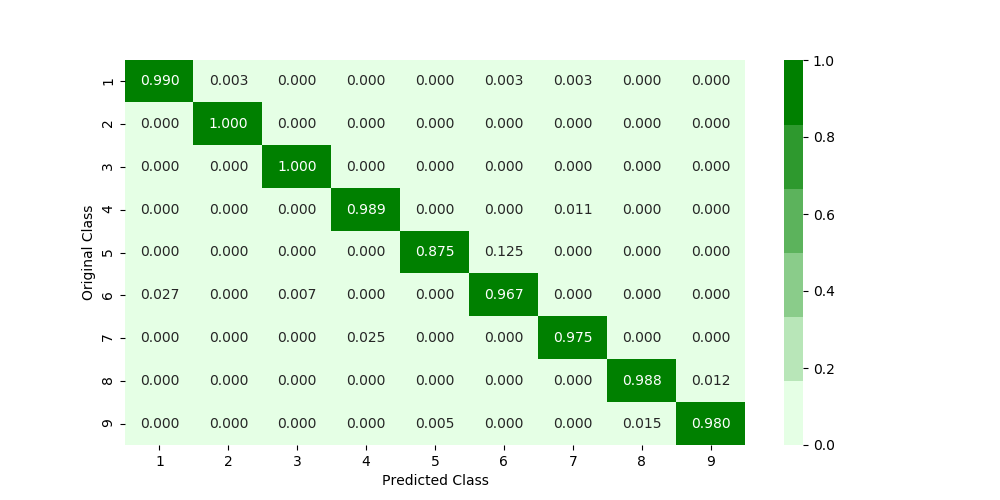

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [53]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    print('For k = ',i)
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

For C =  1e-05
For C =  0.0001
For C =  0.001
For C =  0.01
For C =  0.1
For C =  1
For C =  10
For C =  100
For C =  1000
log_loss for c =  1e-05 is 0.6124787071799669
log_loss for c =  0.0001 is 0.4751208970123429
log_loss for c =  0.001 is 0.3977660473853282
log_loss for c =  0.01 is 0.3760540596894935
log_loss for c =  0.1 is 0.3611079524704754
log_loss for c =  1 is 0.34044976162745205
log_loss for c =  10 is 0.34172723104482733
log_loss for c =  100 is 0.33636416411211234
log_loss for c =  1000 is 0.35344162276452423


<IPython.core.display.Javascript object>


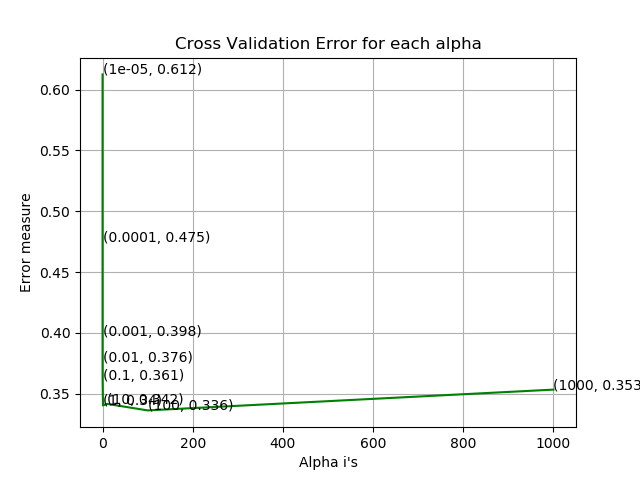

log loss for train data 0.3212305712115807
log loss for cv data 0.33636416411211234
log loss for test data 0.3252260819309329
Number of misclassified points  10.027598896044159
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


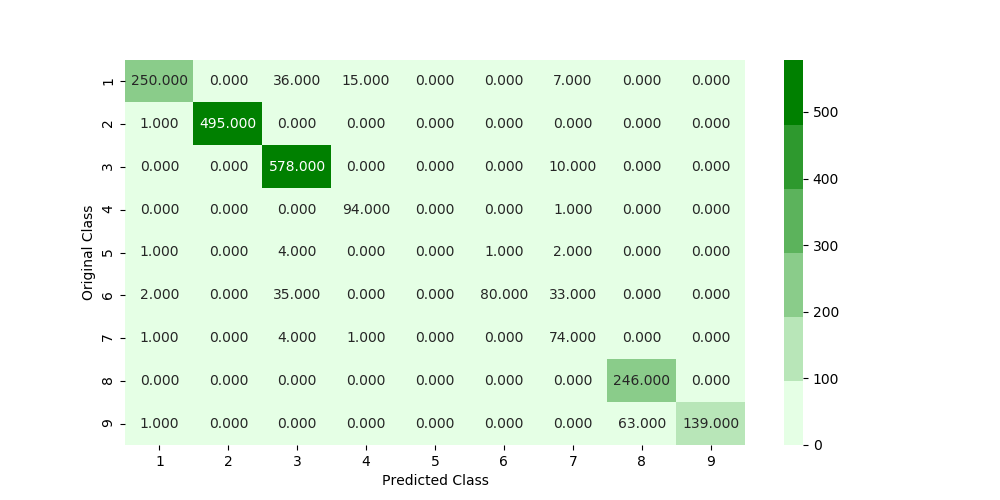

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


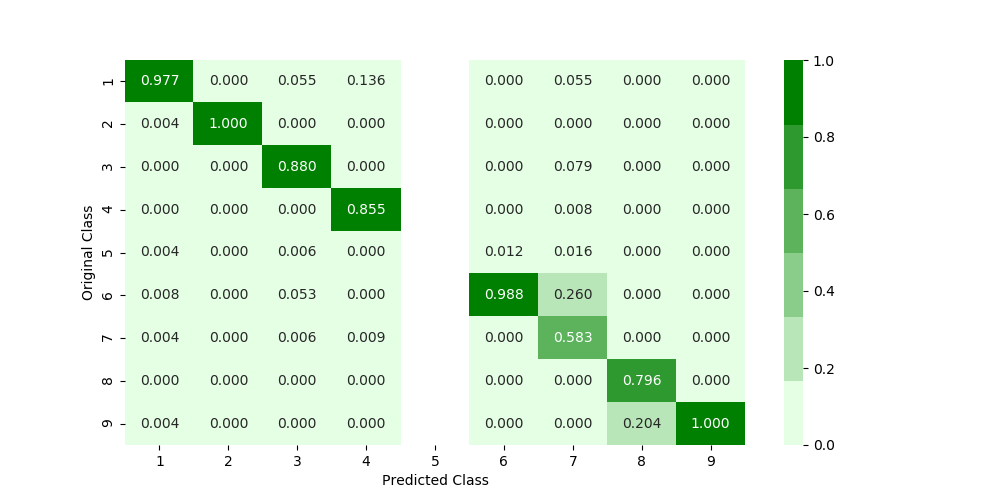

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


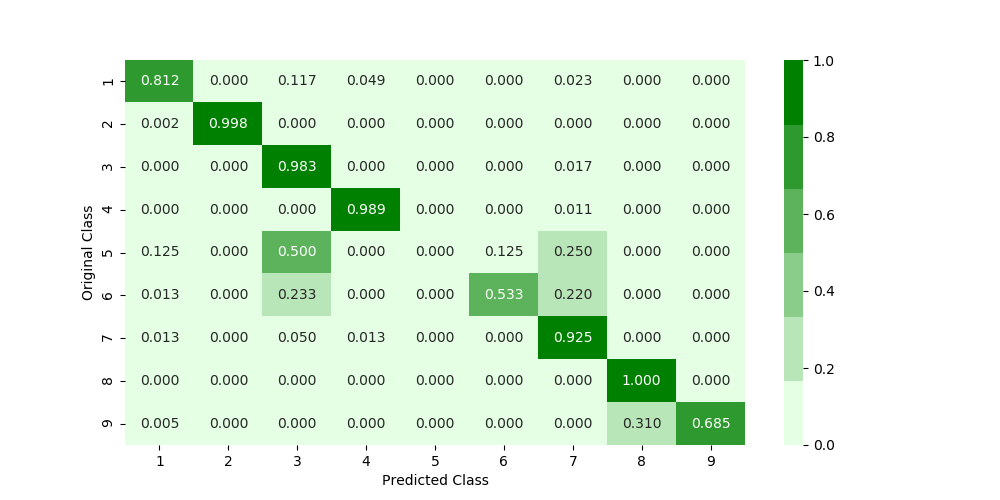

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [54]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    print('For C = ',i)
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

For estimator =  10
For estimator =  50
For estimator =  100
For estimator =  500
For estimator =  1000
For estimator =  2000
For estimator =  3000
log_loss for c =  10 is 0.019683804059731778
log_loss for c =  50 is 0.017718381172568694
log_loss for c =  100 is 0.01644343749170818
log_loss for c =  500 is 0.016054768918798396
log_loss for c =  1000 is 0.01579015124916087
log_loss for c =  2000 is 0.015750874531983823
log_loss for c =  3000 is 0.015864170478007575


<IPython.core.display.Javascript object>


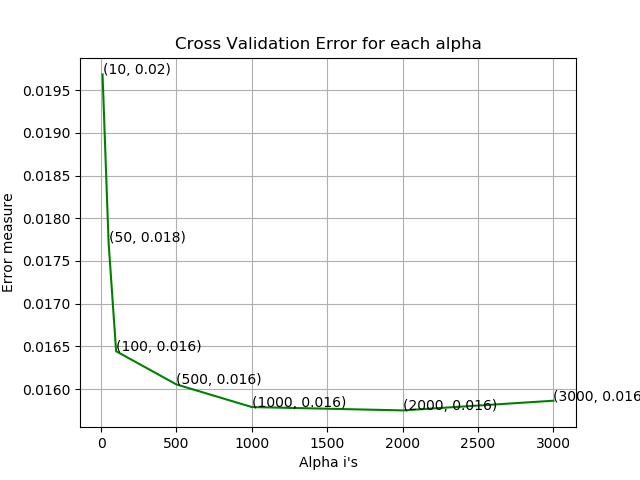

log loss for train data 0.01033319416987003
log loss for cv data 0.015750874531983823
log loss for test data 0.021136720289532153
Number of misclassified points  0.36798528058877644
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


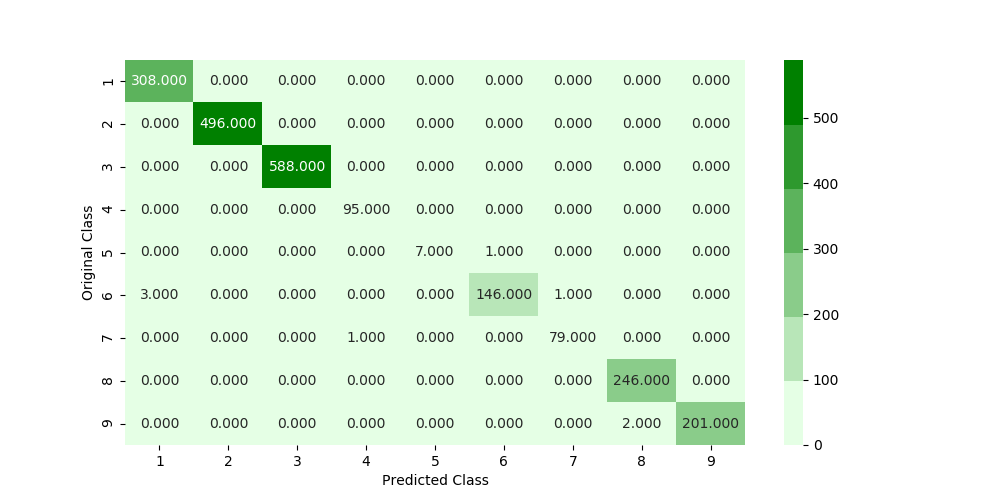

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


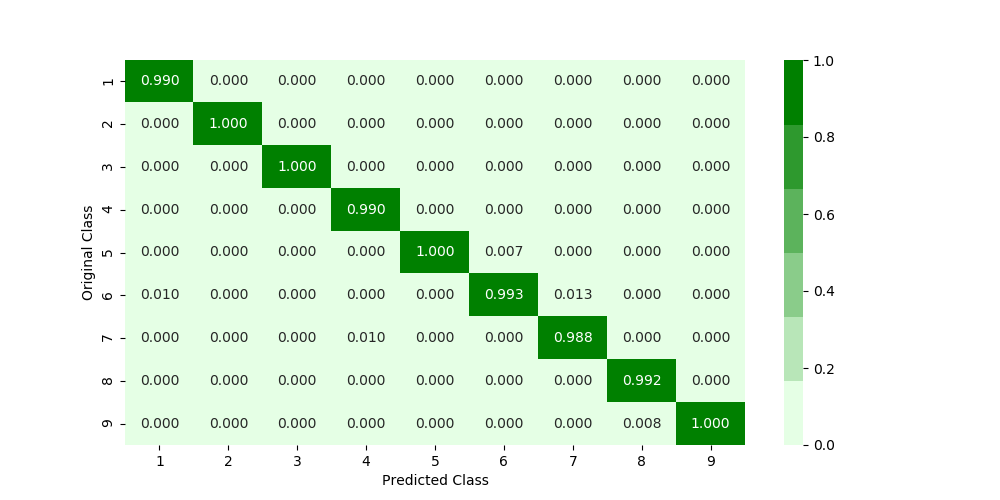

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


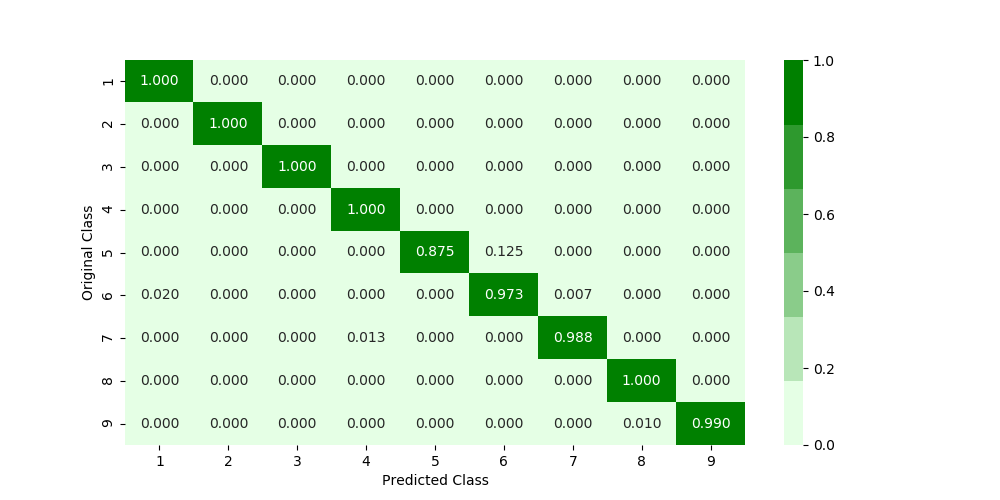

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [55]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    print('For estimator = ',i)
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

For estimator =  10
For estimator =  50
For estimator =  100
For estimator =  500
For estimator =  1000
For estimator =  2000
For estimator =  3000
log_loss for c =  10 is 0.04992282929194357
log_loss for c =  50 is 0.02598101172114864
log_loss for c =  100 is 0.01779345310522223
log_loss for c =  500 is 0.014743518272656544
log_loss for c =  1000 is 0.014555198646745888
log_loss for c =  2000 is 0.014459489185114926
log_loss for c =  3000 is 0.01445476662318132


<IPython.core.display.Javascript object>


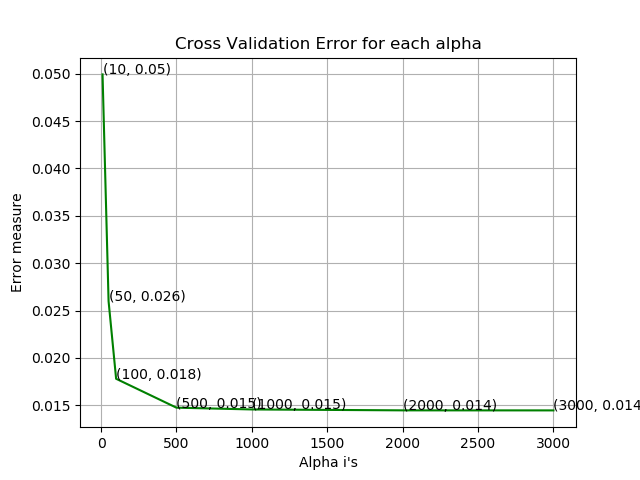

For values of best alpha =  3000 The train log loss is: 0.008733764783017739
For values of best alpha =  3000 The cross validation log loss is: 0.01445476662318132
For values of best alpha =  3000 The test log loss is: 0.03316661864010893
Number of misclassified points  0.45998160073597055
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


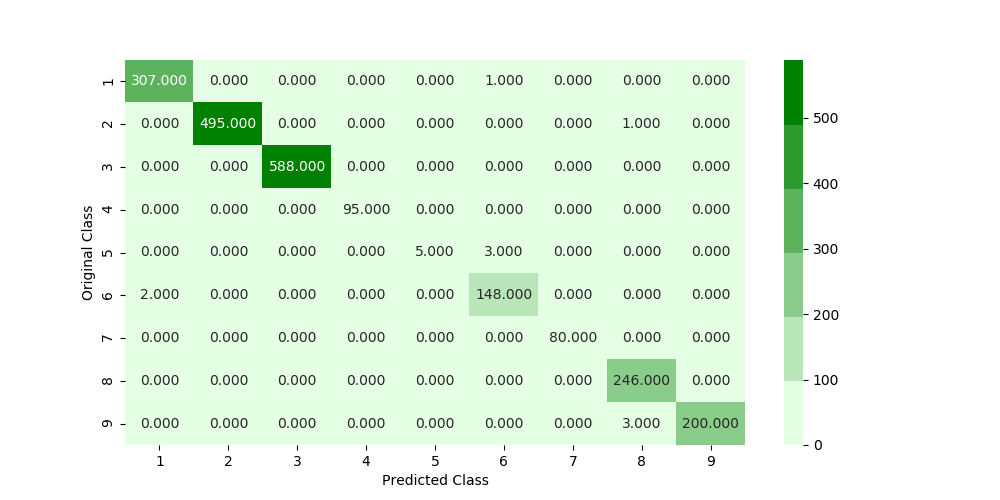

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


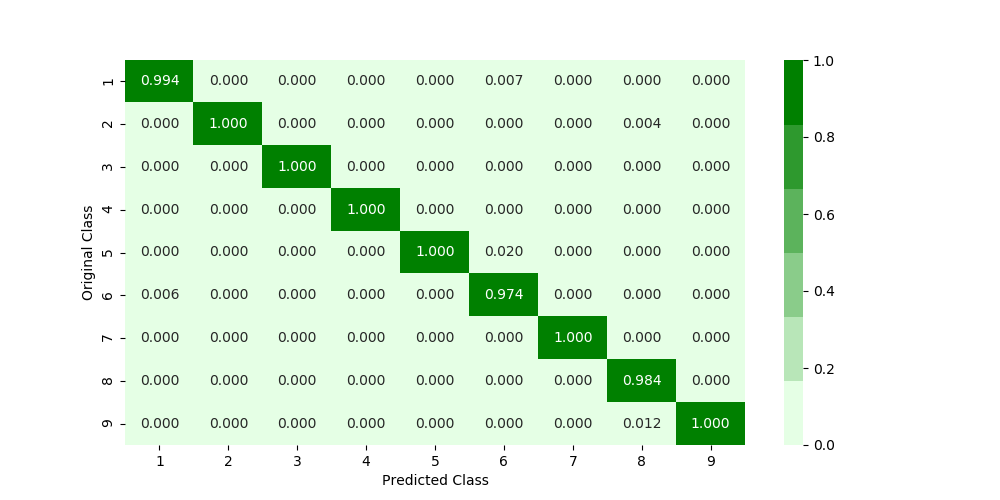

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


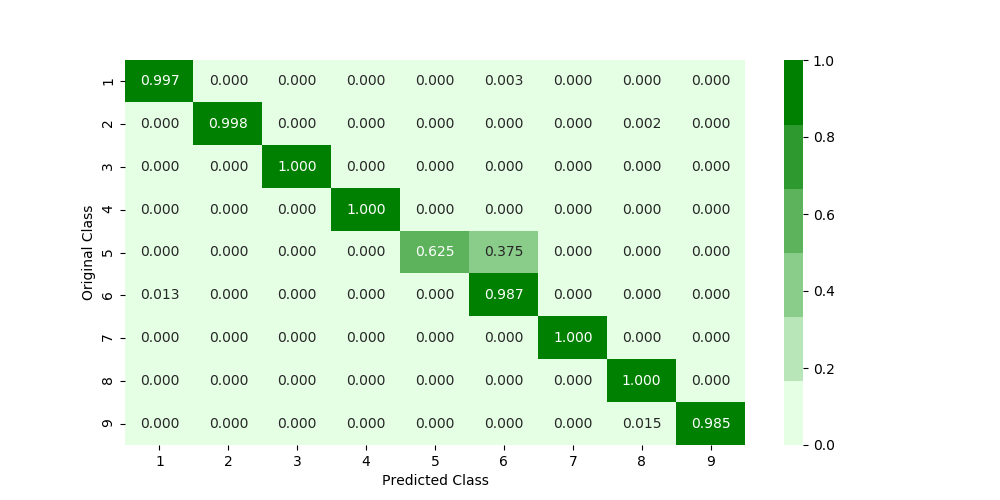

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [56]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    print('For estimator = ',i)
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [57]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=1,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.5min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distrib

In [58]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.1}


In [59]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(subsample= 0.3, n_estimators= 1000, max_depth= 10, learning_rate= 0.03, colsample_bytree= 0.5)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.009759075491612286
cv loss 0.015404153604484504
test loss 0.027258792256670696


<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [60]:
result.head()

,Unnamed: 0,00,0000,0001,0002,0003,0004,0005,0006,0007,...,FFF9,FFFA,FFFB,FFFC,FFFD,FFFE,FFFF,ID,size,Class
0,0.000000,0.262806,0.127389,0.079943,0.054323,0.088980,0.064972,0.090303,0.109255,0.121901,...,0.001933,0.003526,0.001031,0.001188,0.001294,0.000759,0.001227,01azqd4InC7m9JpocGv5,0.092219,9
1,0.001001,0.017358,0.009262,0.057364,0.004340,0.003270,0.010955,0.001075,0.000583,0.001215,...,0.019884,0.031735,0.009574,0.001619,0.014518,0.015811,0.006936,01IsoiSMh5gxyDYTl4CB,0.121236,2
2,0.002002,0.040827,0.007479,0.047232,0.010648,0.010951,0.035070,0.063427,0.053511,0.017744,...,0.022370,0.076164,0.017381,0.007125,0.013943,0.010625,0.003393,01jsnpXSAlgw6aPeDxrU,0.084499,9
3,0.003003,0.009209,0.004620,0.016276,0.004001,0.005248,0.007097,0.003655,0.001845,0.002552,...,0.002486,0.009168,0.002504,0.009284,0.003450,0.007969,0.001954,01kcPWA9K2BOxQeS5Rju,0.010759,1
4,0.004004,0.008629,0.007132,0.004627,0.001356,0.008366,0.000551,0.001183,0.000291,0.000608,...,0.006628,0.001410,0.000147,0.000000,0.000575,0.000379,0.000108,01SuzwMJEIXsK7A8dQbl,0.006233,8


In [61]:
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,10990,10991,10992,10993,10994,10995,10996,10997,10998,10999
0,01kcPWA9K2BOxQeS5Rju,0.107345,0.001092,0.0,0.000761,0.000023,0.0,0.000084,0.0,0.000072,...,71,77,69,78,84,32,72,69,65,68
1,1E93CpP60RHFNiT5Qfvn,0.096045,0.001230,0.0,0.000617,0.000019,0.0,0.000000,0.0,0.000072,...,32,32,32,32,58,9,80,111,114,116
2,3ekVow2ajZHbTnBcsDfX,0.096045,0.000627,0.0,0.000300,0.000017,0.0,0.000038,0.0,0.000072,...,59,32,70,111,114,109,97,116,9,32
3,3X2nY7iQaPBIWDrAZqJe,0.096045,0.000333,0.0,0.000258,0.000008,0.0,0.000000,0.0,0.000072,...,32,32,32,32,58,9,80,111,114,116
4,46OZzdsSKDCFV8h7XWxf,0.096045,0.000590,0.0,0.000353,0.000068,0.0,0.000000,0.0,0.000072,...,32,32,32,32,58,9,80,111,114,116


In [62]:
print(result.shape)
print(result_asm.shape)

(10868, 66036)
(10868, 1054)


In [63]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

,Unnamed: 0,00,0000,0001,0002,0003,0004,0005,0006,0007,...,10990,10991,10992,10993,10994,10995,10996,10997,10998,10999
0,0.000000,0.262806,0.127389,0.079943,0.054323,0.088980,0.064972,0.090303,0.109255,0.121901,...,116,101,120,116,58,48,48,52,48,49
1,0.001001,0.017358,0.009262,0.057364,0.004340,0.003270,0.010955,0.001075,0.000583,0.001215,...,10,46,116,101,120,116,58,48,48,52
2,0.002002,0.040827,0.007479,0.047232,0.010648,0.010951,0.035070,0.063427,0.053511,0.017744,...,116,101,120,116,58,48,48,52,48,49
3,0.003003,0.009209,0.004620,0.016276,0.004001,0.005248,0.007097,0.003655,0.001845,0.002552,...,71,77,69,78,84,32,72,69,65,68
4,0.004004,0.008629,0.007132,0.004627,0.001356,0.008366,0.000551,0.001183,0.000291,0.000608,...,116,101,120,116,58,48,48,52,48,49


<h3> 4.5.2. Train and Test split</h3>

In [64]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.3. Xgboost Classifier with best hyperparameters</h3>

In [65]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=1,n_jobs=4,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed: 20.5min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_al...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=4,
                   param_distribu

In [66]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.15, 'colsample_bytree': 0.1}


In [67]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(subsample= 0.3, n_estimators= 1000, max_depth= 10, learning_rate= 0.03, colsample_bytree= 0.5)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

train loss 0.009759075491612286
cv loss 0.015404153604484504
test loss 0.027258792256670696


In [68]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Data", "Model", "Train logloss", "Test logloss"]
x.add_row(["Only byte files","Logistic Regression",  round(0.06645698722998557,3), round(0.18994698178499667,3)])
x.add_row(["asm files with image features","XGBoost",  round(0.009477617552245923,3), round(0.021151928630058183,3)])
x.add_row(["Both byte and asm files with image features","XGboost",  round(0.009759075491612286,3), round(0.027258792256670696,3)])
x.border=True
print(x)

+---------------------------------------------+---------------------+---------------+--------------+
|                     Data                    |        Model        | Train logloss | Test logloss |
+---------------------------------------------+---------------------+---------------+--------------+
|               Only byte files               | Logistic Regression |     0.066     |     0.19     |
|        asm files with image features        |       XGBoost       |     0.009     |    0.021     |
| Both byte and asm files with image features | Logistic Regression |      0.11     |    0.122     |
+---------------------------------------------+---------------------+---------------+--------------+


`Clearly asm files with image fetures is the best Model.`
`Using both byte files and asm files, did not impacted much on model.`